In [1]:
# Note: no CUDA on my laptop, so I'll get an error
import tensorflow as tf

2022-03-05 22:06:43.073597: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-05 22:06:43.073630: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Grab the built-in Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
# and split it into training and validation sets
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

In [3]:
import matplotlib.pyplot as plt

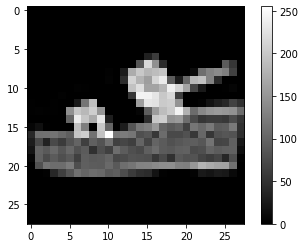

5


In [4]:
# Display a random image from the training set (any number between 0 and 59,999)
data_idx = 12

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

# and note the label
print(train_labels[data_idx])

# Build a neuron

In [5]:
# First get the number of classes in the dataset
num_classes = len(set(train_labels))
print(num_classes)

10


In [12]:
# Create a sequential model: flatten the image, and add a dense layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(num_classes))

In [13]:
# Verify the model summary - there should be 28*28 (ie 784) inputs, and 10 outputs, 7840 parameters, plus the 10 biases for each output (7850 in total)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


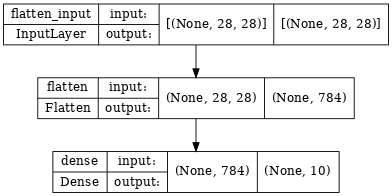

In [8]:
# Alternatively, plot the model
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True, dpi=64)

# Train the model

In [14]:
# Compile the model
# Use the optimizer adam 
# use a loss function of sparse_categorical_crossentropy from logits (to transform the linear outputs into probabilities as a measure of the confidence for a particular class)
# Use a metric of accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
# Fit the model to the training data, ie train the model
history = model.fit(
    train_images, 
    train_labels, 
    epochs=10,
    validation_data=(valid_images, valid_labels),
    verbose=3
)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10


In [27]:
# Display the final accuracy (expected to be around 80%)
print(history.history['accuracy'][-1])

0.8143333196640015


In [28]:
# Evaluate the model
model.evaluate(valid_images, valid_labels, verbose=2)

313/313 - 0s - loss: 12.0090 - accuracy: 0.7957 - 291ms/epoch - 929us/step


[12.00901985168457, 0.7957000136375427]

# Predictions

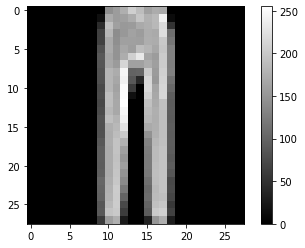

In [37]:
# Pick a random image from the test set and display it
data_idx = 24

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

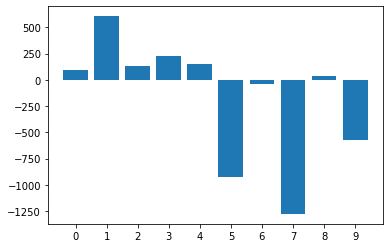

Predicted label: 1
Correct label: 1


In [38]:
# Predict the label for the image and how confident the model is for each class
x_values = range(num_classes)
plt.figure()
plt.bar(x_values, model.predict(valid_images[data_idx:data_idx+1])[0])
plt.xticks(x_values)
plt.show()

print('Predicted label:', model.predict(valid_images[data_idx:data_idx+1])[0].argmax())
print('Correct label:', valid_labels[data_idx])